## Demo

In [3]:
%load_ext autoreload
%autoreload 2
from wavescapes import Wavescape
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from etl import get_pcvs, apply_dft_to_all
from utils import most_resonant, max_utm_to_ws_utm, circular_hue_revised, pitch_class_matrix_to_tritone, pitch_class_matrix_to_minor_major, MOZART_PROFILES


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pcvs = get_pcvs('./pcvs')
dfts = apply_dft_to_all(pcvs)
metadata = pd.read_csv('metadata.tsv', sep='\t', index_col=1)
fname2year = (metadata.composed_end + metadata.composed_start) / 2
print(f"Metadata for {fname2year.shape[0]} files.")
fname2year.head(10)

Metadata for 58 files.


fnames
MIDIl087-03_images_quelques       NaN
l000_etude                     1915.0
l000_soirs                     1917.0
l009_danse                     1880.0
l066-01_arabesques-premiere    1888.0
l067_mazurka                   1890.0
l068_reverie                   1890.0
l069_tarentelle                1890.0
l070_ballade                   1890.0
l071_valse                     1890.0
dtype: float64

In [5]:
piece = 'l000_etude'
utm_max, utm_entropy, utm_argmax = most_resonant(dfts[piece])
utm_max.shape

/home/hentsche/anaconda3/envs/ms9/lib/python3.9/site-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


(284, 284)

In [6]:
utm_sum = max_utm_to_ws_utm(utm_entropy, utm_argmax, dfts[piece], 'entropy')
#utm_sum[utm_sum >= 255] = 255

AssertionError: Value cannot exceed 1 but is 1.0000000000000002

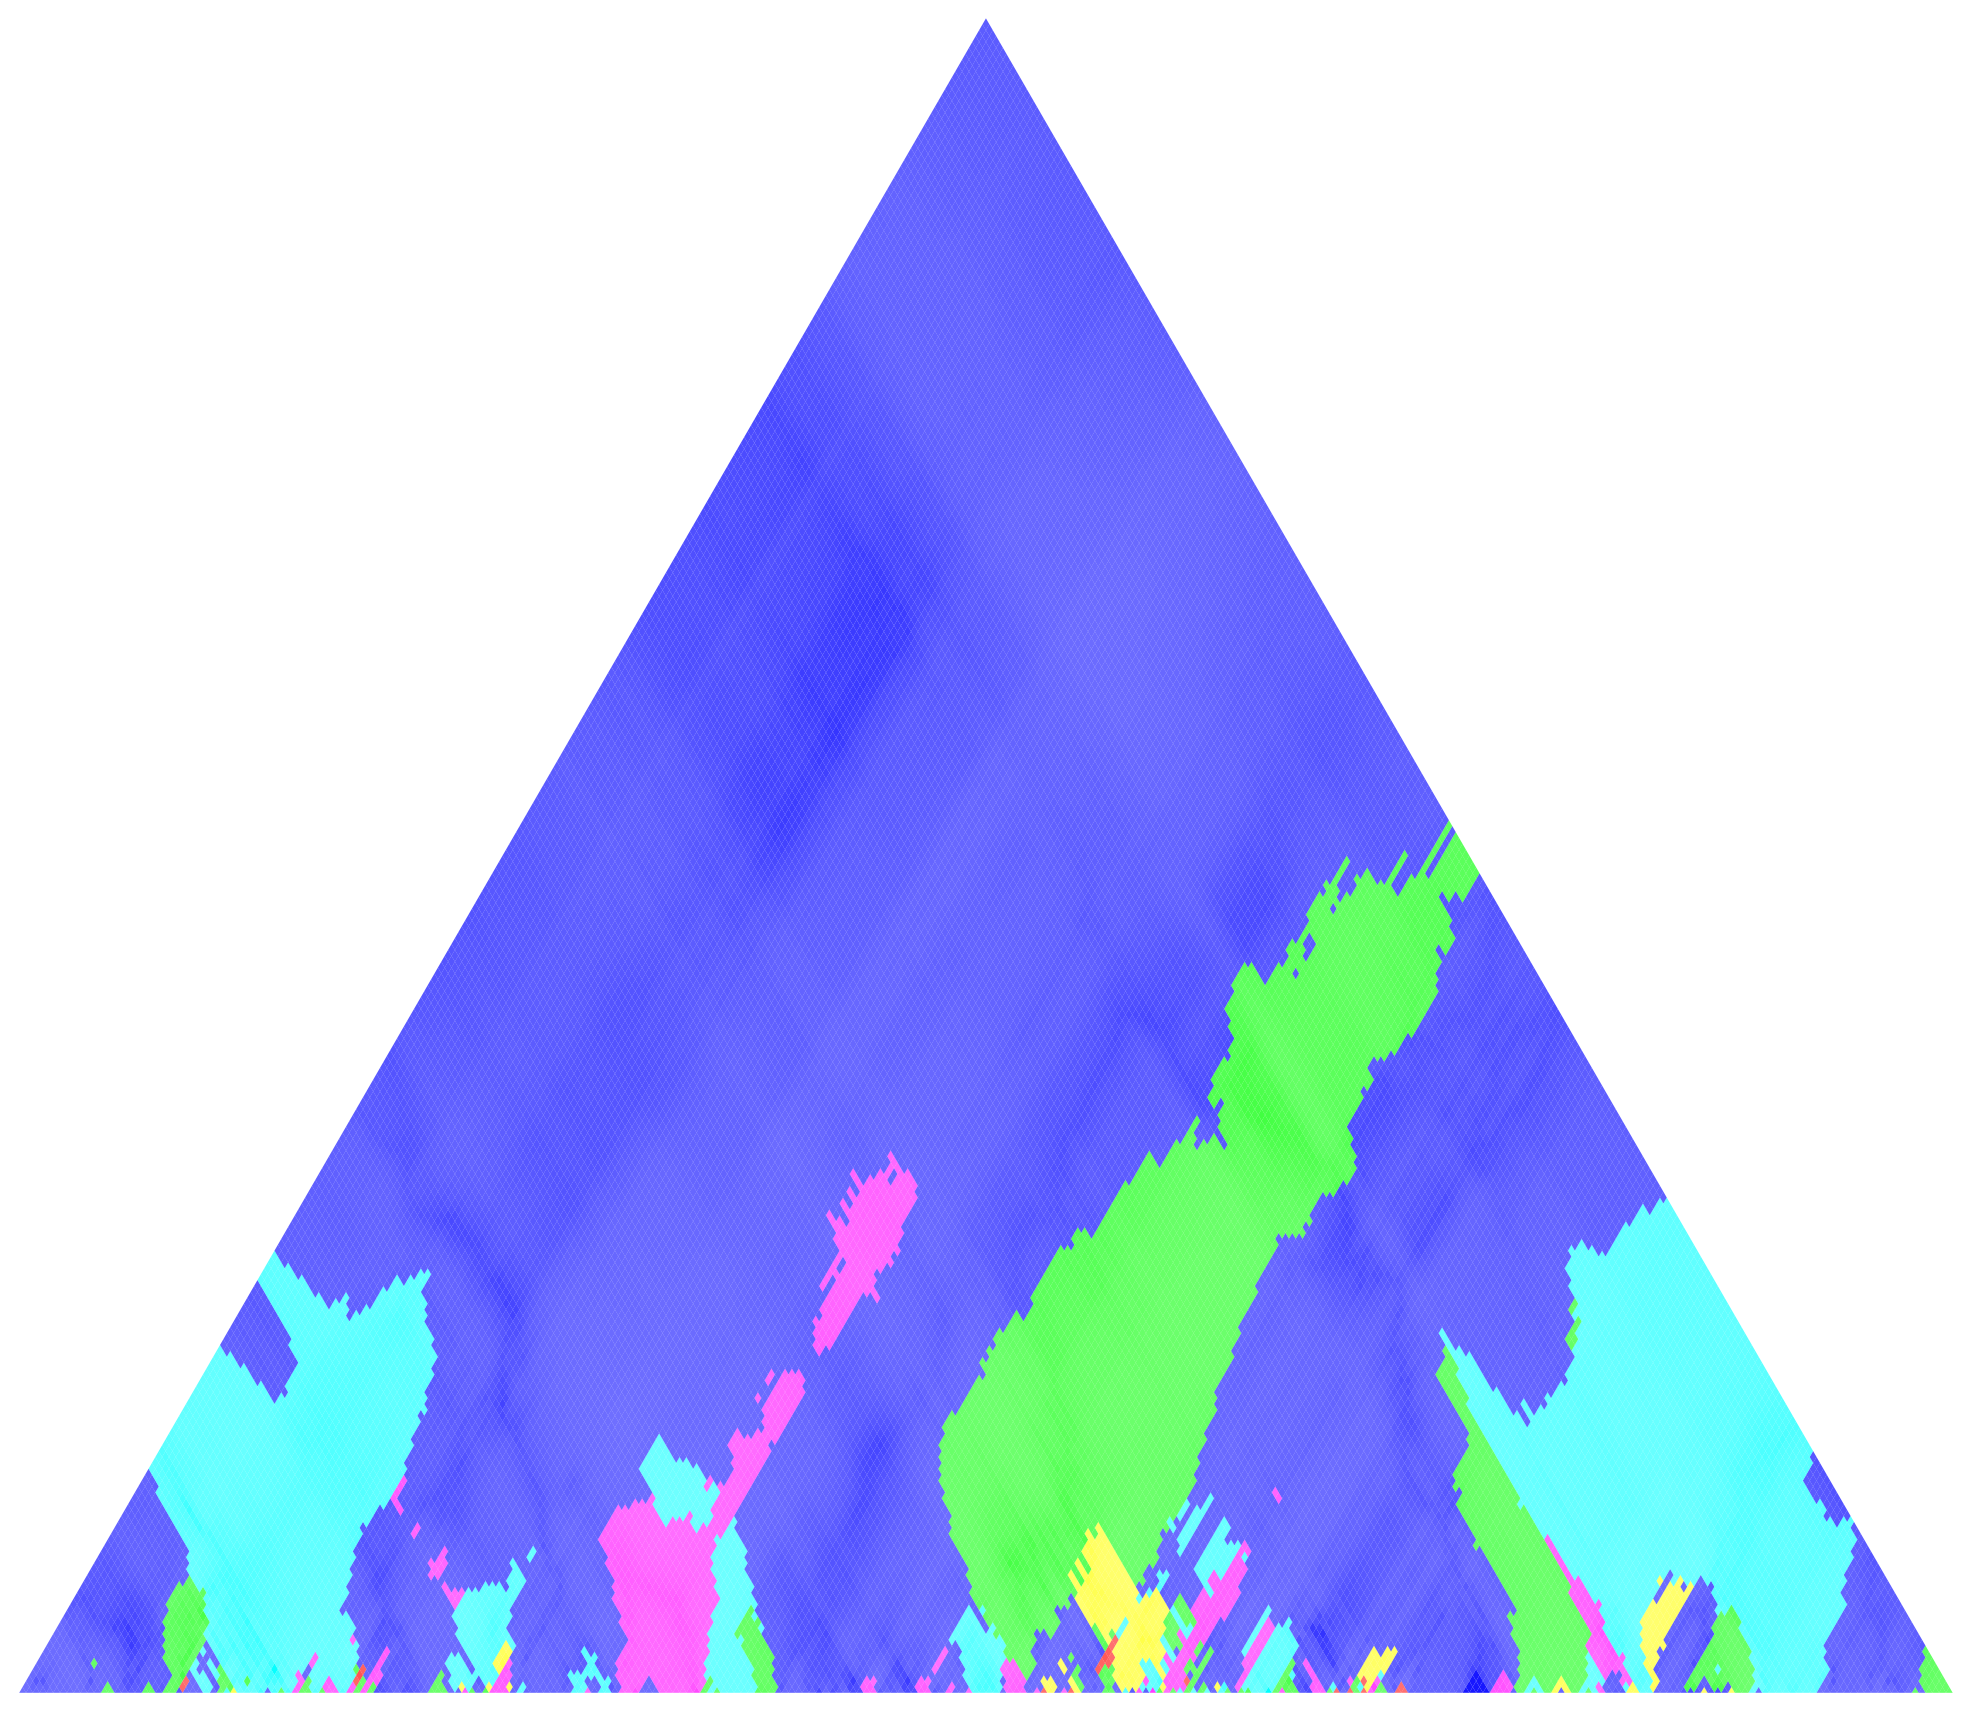

In [ ]:
import matplotlib.patches as mpatches
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))

Wavescape(utm_sum, 1000).draw()
#plt.plot(x, y, marker="o")
#print(data['fnames'][1])

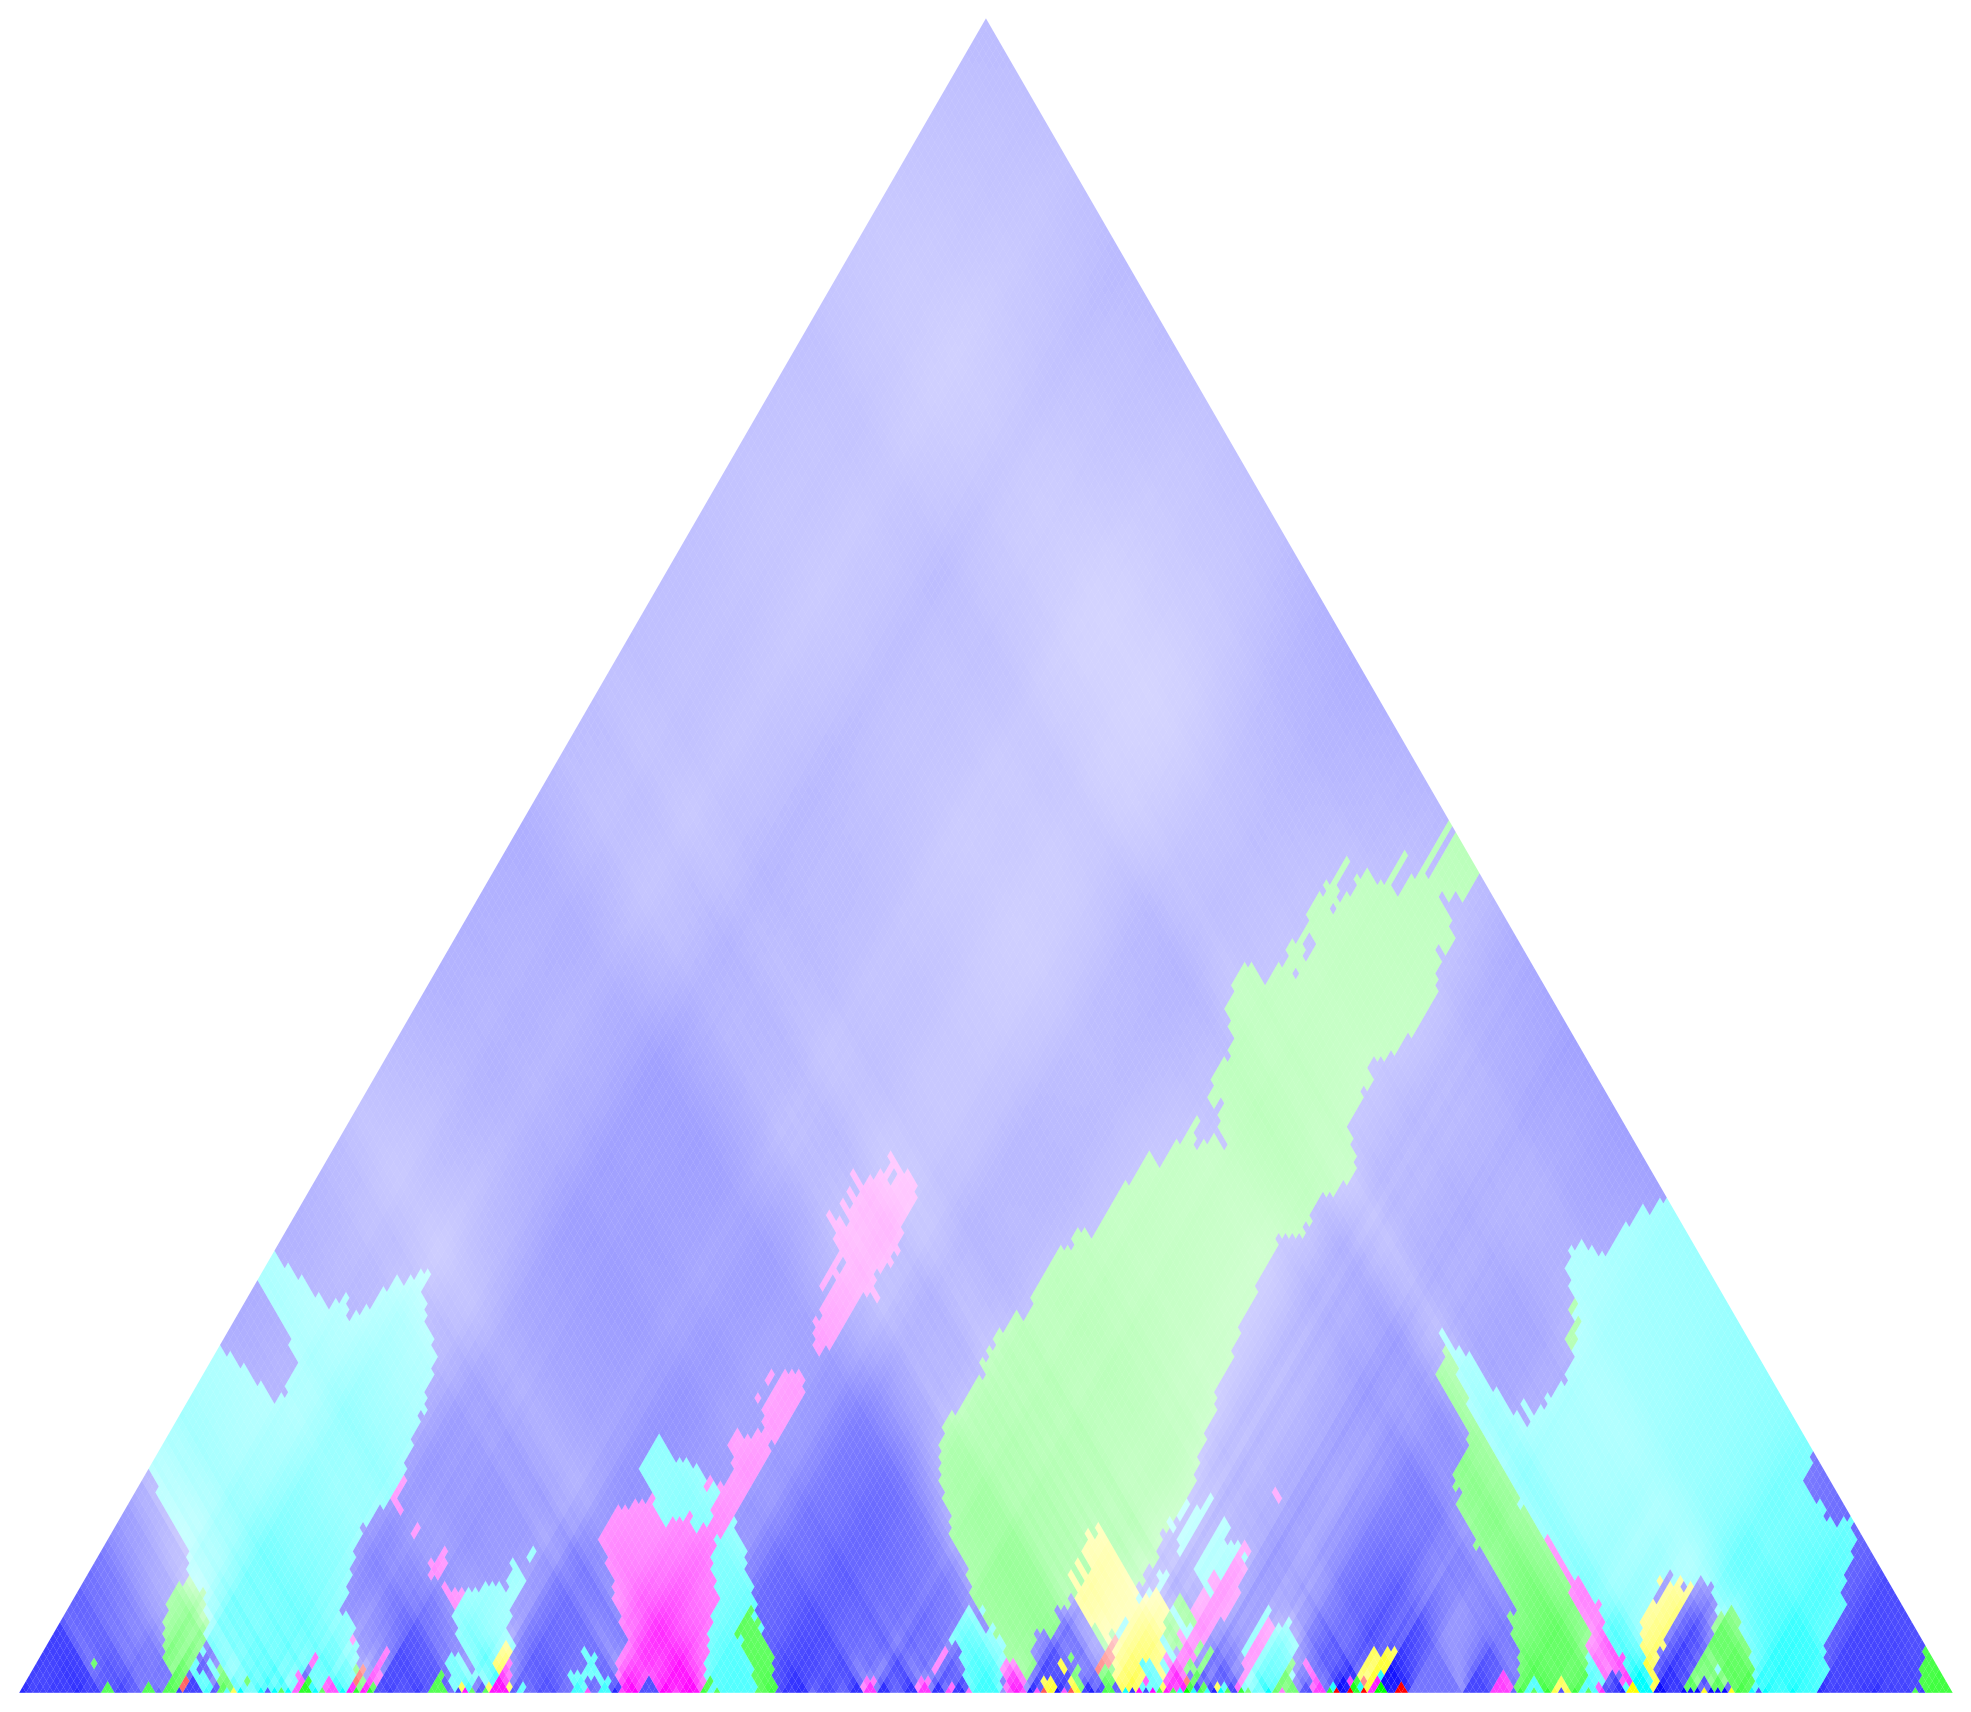

In [ ]:
utm_sum = max_utm_to_ws_utm(utm_max, utm_argmax, dfts[piece], 'max')
Wavescape(utm_sum, 1000).draw()
#plt.plot(x, y, marker="o")
#print(data['fnames'][1])

In [ ]:
for i in range(1,7):
    x, y = center_of_mass_v(np.abs(utm[:,:,i]), utm)
    print(x, y)


0.5890421664889935 0.2721755466370029
0.6257437531335581 0.20792349098860788
0.6853406179548648 0.24541264415274294
0.5999374493577803 0.20839126934092625
0.6342231233292068 0.28512644384231145
0.5721784436717028 0.22576198655918303


0.6342231233292068 0.28512644384231145
l000_etude


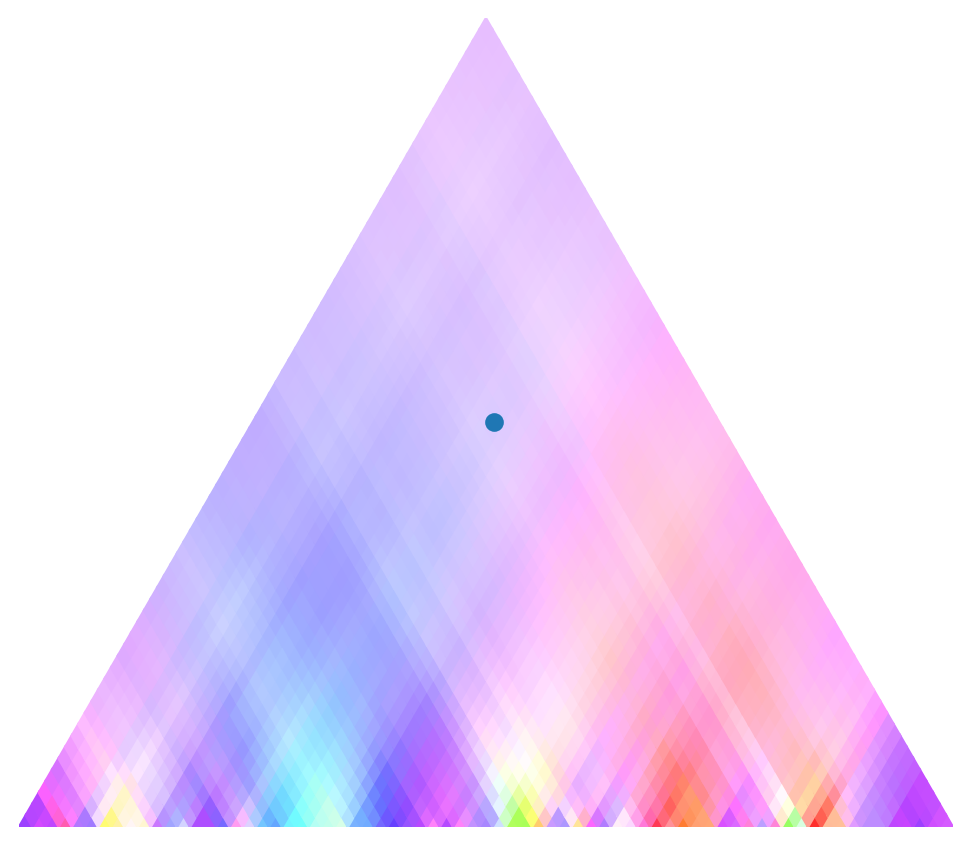

In [ ]:
coeff_5 = complex_utm_to_ws_utm(utm, coeff=5)
x, y = center_of_mass_v(np.abs(utm[:,:,5]), utm)
Wavescape(coeff_5, 500).draw()
plt.plot(x, y, marker="o")
print(x, y)
print(data['fnames'][1])

In [ ]:
all_wavescapes(data['filepath'][1], individual_width=500, aw_size=4)

In [ ]:
if '.\\figures' not in glob('./*'):
    print('making folder')
    os.makedirs('figures')


In [ ]:
import matplotlib.patches as mpatches
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))
        
for score in data['filepath']:
    print(str(score.split('\\')[-1].split('.')[0]))
    try:
        #all_wavescapes(score, individual_width=500, aw_size=4, aw_per_tick=1, tick_start=1)
        utm_max, utm_entropy, utm_argmax, utm = most_resonant(score, aw_size=4)
        utm_sum = max_utm_to_ws_utm(utm_max, utm_argmax, utm, 'max')
        Wavescape(utm_sum, 500).draw()
        plt.suptitle(str(score.split('\\')[-1].split('.')[0]) + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/' + str(score.split('\\')[-1].split('.')[0]) + '.png')
    except:
        print('Not successful')

In [ ]:
import matplotlib.patches as mpatches
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))

for score in data['filepath']:
    print(str(score.split('\\')[-1].split('.')[0]))
    try:
        #all_wavescapes(score, individual_width=500, aw_size=4, aw_per_tick=1, tick_start=1)
        utm_max,  utm_entropy, utm_argmax, utm = most_resonant(score, aw_size=4)
        utm_sum = max_utm_to_ws_utm(utm_entropy, utm_argmax, utm, 'entropy')
        Wavescape(utm_sum, 500).draw()
        plt.suptitle('entropy - ' + str(score.split('\\')[-1].split('.')[0]) + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/entropy_' + str(score.split('\\')[-1].split('.')[0]) + '.png')
    except Exception as e:
        print(e)

In [ ]:
# legend
import webcolors

for angle in range(6):

    value = np.array(circular_hue_revised(angle))[:3]
    print('coefficient', angle+1, ':',  webcolors.rgb_to_name(value))

In [ ]:
vcoms = []
for it in data.iterrows():
    print(it[1]['filepath'])
    utm_max, utm_argmax, utm = most_resonant(it[1]['filepath'], aw_size=4)
    vcoms.append(center_of_mass_v(utm_max, utm)[1])

In [ ]:
# add vcom for each coefficient

In [ ]:
data['VCOM'] = vcoms

In [ ]:
plt.scatter(data['composed_start'], data['VCOM'])

In [ ]:
plt.scatter(data['composed_end'], data['VCOM'])

In [16]:
utm_tritone = pitch_class_matrix_to_tritone(pcvs[piece])
print(utm_tritone.shape)
#utm_tritone[0]

(284, 284, 1)


In [ ]:
arr2 = np.roll(pcvs[piece], 6, axis=1)

pcvs[piece][0]

array([0.167, 0.   , 0.   , 0.334, 0.   , 0.   , 0.   , 0.   , 1.334,
       0.   , 0.167, 0.   ])

In [ ]:
arr2[0]


array([0.   , 0.   , 1.334, 0.   , 0.167, 0.   , 0.167, 0.   , 0.   ,
       0.334, 0.   , 0.   ])

In [ ]:
tritone = pcvs[piece] * arr2
tritone[30]

array([0.    , 0.    , 0.0835, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0835, 0.    , 0.    , 0.    ])

In [ ]:
utm.shape

(71, 71, 7)

In [ ]:
utm = np.abs(utm)
x,y = center_of_mass_v(utm_max, utm)

In [17]:
utm = np.concatenate((dfts[piece], utm_tritone), axis=2)
utm.shape

(284, 284, 8)

In [18]:
# major and minor detector

key_profiles = {
    'major': np.array(list(MOZART_PROFILES['major'].values())),
    'minor': np.array(list(MOZART_PROFILES['minor'].values()))
}
rotated_kp = {(mode, rotation): np.roll(kp, rotation) for mode, kp in key_profiles.items() for rotation in range(12)}
rotated_kp

{('major',
  0): array([0.200337  , 0.01081261, 0.1139921 , 0.01210411, 0.13638737,
        0.12263113, 0.01899352, 0.20490465, 0.01461186, 0.07414111,
        0.01135115, 0.07973339]),
 ('major',
  1): array([0.07973339, 0.200337  , 0.01081261, 0.1139921 , 0.01210411,
        0.13638737, 0.12263113, 0.01899352, 0.20490465, 0.01461186,
        0.07414111, 0.01135115]),
 ('major',
  2): array([0.01135115, 0.07973339, 0.200337  , 0.01081261, 0.1139921 ,
        0.01210411, 0.13638737, 0.12263113, 0.01899352, 0.20490465,
        0.01461186, 0.07414111]),
 ('major',
  3): array([0.07414111, 0.01135115, 0.07973339, 0.200337  , 0.01081261,
        0.1139921 , 0.01210411, 0.13638737, 0.12263113, 0.01899352,
        0.20490465, 0.01461186]),
 ('major',
  4): array([0.01461186, 0.07414111, 0.01135115, 0.07973339, 0.200337  ,
        0.01081261, 0.1139921 , 0.01210411, 0.13638737, 0.12263113,
        0.01899352, 0.20490465]),
 ('major',
  5): array([0.20490465, 0.01461186, 0.07414111, 0.01135115

In [19]:
utm_major_minor = pitch_class_matrix_to_minor_major(pcvs[piece], rotated_kp)

In [20]:
utm_major_minor.shape

(284, 284, 2)

In [21]:
utm = np.concatenate((utm, utm_major_minor), axis=2)
utm.shape

(284, 284, 10)

In [22]:
from sklearn.preprocessing import MinMaxScaler

data_exp = pd.DataFrame(utm[:,:,1:].reshape(utm.shape[0]*utm.shape[0], 9))
data_exp = data_exp[data_exp[0] != 0]
data_exp.columns = ['Coeff 1', 'Coeff 2', 'Coeff 3', 'Coeff 4', 'Coeff 5', 'Coeff 6', 'Tritone', 'Major', 'Minor']
scaler = MinMaxScaler()

data_exp = pd.DataFrame(scaler.fit_transform(data_exp), columns=data_exp.columns)

data_exp

ValueError: cannot reshape array of size 483936 into shape (5041,9)

In [23]:
from scipy.stats import pearsonr

for col in data_exp.columns:
    for col2 in data_exp.columns:
        if col != col2:
            corr = pearsonr(data_exp[col], data_exp[col2])
            if abs(corr[0]) > 0.5:
                print(col, col2)
                print(pearsonr(data_exp[col], data_exp[col2]))

NameError: name 'data_exp' is not defined